# Machine Learning - Yelp Project

La industria de la restauración esta más dura que nunca, con críticas en Internet desde el primer día de la apertura de un restaurante. Pero como amante de la comida, usted y su amigo deciden entrar en la industria y abrir su propio restaurante, Danielle's Delicious Delicacies. Dado que el éxito de un restaurante está altamente correlacionado con su reputación, usted quiere asegurarse de que Danielle's Delicious Delicacies tenga las mejores críticas en el sitio de reseñas de restaurantes más consultado: Yelp! 

Aunque usted sabe que su comida será deliciosa, cree que hay otros factores que influyen en la calificación de Yelp y que, en última instancia, determinarán el éxito de su negocio. Con un conjunto de datos de diferentes características del restaurante y sus clasificaciones Yelp, usted decide usar un modelo de Regresión Lineal Múltiple para investigar qué factores afectan más la clasificación Yelp de un restaurante y predecir la clasificación Yelp para su restaurante.

En este proyecto trabajaremos con un conjunto de datos reales proporcionados por Yelp. Hemos proporcionado seis archivos, que se enumeran a continuación con una breve descripción:

`yelp_business.json`: datos del establecimiento relativos a la ubicación y los atributos de todas las empresas en el conjunto de datos
`yelp_review.json`: metadatos de las calificaciones por empresa
`yelp_user.json`: metadatos del perfil de usuario por empresa
`yelp_checkin.json`: metadatos de facturación online por empresa
`yelp_tip.json`: metadatos de consejos por empresa
`yelp_photo.json`: metadatos de fotos por empresa

Nota: como puede ver los datos estan en `.json`, un formato diferente a `.csv`, pero no te preocupes, es lo mismo al momento de importarlos y trabajarlos, aqui te vamos a ir enseñando como, sigue adelante!

## Cargar los datos y echar un vistazo
Para obtener una mejor comprensión del conjunto de datos podemos usar Pandas para explorar los datos en forma de DataFrame. En el siguiente bloque de código debes importar Pandas. El método `read_json()` lee los datos de un archivo json en un DataFrame, como se muestra a continuación:

`df = pd.read_json('file_name.json', lines=True)`

Cargue los datos de cada uno de los archivos json con las siguientes convenciones para fijar nombres:

`yelp_business.json` en un DataFrame llamado `business`

`yelp_review.json` en un DataFrame llamado `reviews`

`yelp_user.json` en un DataFrame nombrando `users`

`yelp_checkin.json` en un DataFrame llamado `checkins`

`yelp_tip.json` en un DataFrame llamado `tips`

`yelp_photo.json` en un DataFrame llamado `photos`

La importación de esos datos puede tardar de 10 a 20 segundos en ejecutarse dependiendo de su computadora, pero no se preocupe, una vez cargados, ¡ya está listo para empezar!

In [1]:
import pandas as pd

businesses = pd.read_json('yelp_datasets/yelp_business.json',lines=True)
reviews = pd.read_json('yelp_datasets/yelp_review.json',lines=True)
users = pd.read_json('yelp_datasets/yelp_user.json',lines=True)
checkins = pd.read_json('yelp_datasets/yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_datasets/yelp_tip.json',lines=True)
photos = pd.read_json('yelp_datasets/yelp_photo.json',lines=True)

Para poder ver más claramente la información en nuestro DataFrame, podemos ajustar el número de columnas mostradas (`max_columns`) y el número de caracteres mostrados en una columna (`max_colwidth`) con el siguiente código:

```
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

Ajuste `max_columns` a `60` y `max_colwidth` a `500`. Estamos trabajando con algunos datos GRANDES aquí! (bienvenido al Big Data!)

In [14]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

Inspeccione las primeras cinco filas de cada DataFrame usando el método `.head()` para obtener una visión general de los datos (asegúrese de revisar cada DataFrame en una celda separada para poder verlo correctamente).

In [22]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [23]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [24]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [25]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [26]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [27]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


¿Cuántos negocios diferentes hay en el conjunto de datos? ¿Cuáles son las diferentes características/features/columnas en el DataFrame `reviews`?

In [28]:
print(len(businesses))
print(reviews.columns)

188593
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


¿Cuál es el rango de valores para las features del DataFrame `users`? Nota: puedes usar el metodo `.describe()` para hacer esto

In [29]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


¿Cuál es la calificación Yelp, o estrellas, del establecimiento con `business_id=5EvUIR4IzCWWUOOm0PsUZXjA` Utilice la indexación booleana de Pandas para encontrar la clasificación de Yelp, usando la sintaxis de abajo:

```
df[df['column_we_know'] == 'value_we_know']['column_we_want']
```

In [30]:
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

## Fusionar los datos
Como estamos trabajando con datos de varios archivos, necesitamos combinar los datos en un solo DataFrame que nos permita analizar las diferentes características con respecto a nuestra variable objetivo, la clasificación Yelp. 

Podemos hacer esto fusionando los múltiples DataFrames que tenemos juntos, uniéndolos en las columnas que tienen en común. En nuestro caso, esta columna de identificación única es el `business_id`. 

Dados nuestros seis DataFrames, necesitaremos realizar 5 fusiones para combinar todos los datos en un solo DataFrame. Fusione primero `business` y `reviews` con un `left join` y asignelo a una variable llamada `df`

In [31]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


Combine cada uno de los otros 4 DataFrames en nuestro nuevo DataFrame `df` para combinar todos los datos juntos. Asegúrese de que `df` es el DataFrame izquierdo en cada fusión y que hace `left join` en cada uno de ellos ya que no todos los DataFrame incluyen todos los negocios en el conjunto de datos (de esta manera no perderemos ningún dato durante las fusiones). Una vez combinada, imprima las columnas de `df`. ¿Qué características/features/columnas tiene este nuevo DataFrame?

In [32]:
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

In [33]:
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


In [34]:
df.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,time,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18': 2, 'Wed-18': 1, 'Fri-19': 2, 'Thu-19': 2, 'Sat-20': 3, 'Thu-20': 1, 'Tue-20': 1, 'Sat-21': 2, 'Tue-21': 1, 'Fri-22': 1, 'Sat-22': 1, 'Thu-22': 1, 'Fri-23': 1, 'Sat-23': 1}",11.0,18.0,38.0,6.0,NaN,NaN
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,{'Sun-1': 1},0.0,1.0,66.0,1.0,29.0,1.0
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,"{'Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1': 1, 'Sat-17': 1, 'Wed-20': 1, 'Sat-23': 1}",2.0,5.0,32.0,1.0,NaN,NaN
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.3

In [35]:
print(len(df))

188593


## Limpieza de los datos
Nos estamos acercando mucho a la parte del análisis divertido! Sólo tenemos que limpiar un poco nuestros datos para que podamos centrarnos en las características que podrían tener poder predictivo para determinar la calificación Yelp de un establecimiento.

En un modelo de Regresión Lineal, nuestras características serán idealmente variables continuas que afectan a nuestra variable dependiente, o sea la clasificación de Yelp. Para este proyecto también se trabajará con algunas características que son binarias, en la escala `[0,1]`. Con esta información, podemos eliminar cualquier columna en el conjunto de datos que no sea continua o binaria, y sobre la que no queramos hacer predicciones. La siguiente celda contiene una lista de estas características innecesarias. Sáquelos de `df` con la sintaxis de `drop` de Pandas, basicamente necesitamos remover las siguientes columnas:

```
'address',
'attributes',
'business_id',
'categories',
'city',
'hours',
'is_open',
'latitude',
'longitude',
'name',
'neighborhood',
'postal_code',
'state',
'time'
```

In [36]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

In [37]:
df.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi',
       'price_range', 'review_count', 'stars', 'take_reservations',
       'takes_credit_cards', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')

In [38]:
df.head()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,0,1,0,0,2,24,4.0,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,11.0,18.0,38.0,6.0,NaN,NaN
1,0,1,0,0,2,3,4.5,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,0.0,1.0,66.0,1.0,29.0,1.0
2,1,1,1,1,2,5,4.0,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,2.0,5.0,32.0,1.0,NaN,NaN
3,0,0,0,0,0,8,1.5,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.375000,68.000000,0.250000,1.0,0.0,NaN,NaN,NaN,NaN
4,0,0,0,0,0,4,2.0,0,1,1412.750000,1015.500000,0.372550,0,0,4,137.750000,2570.000000,26.750000,528.250000,4.250000,2.0,0.0,NaN,NaN,NaN,NaN


Ahora sólo tenemos que comprobar nuestros datos para asegurarnos de que no nos faltan valores, o `NaNs`, lo que impedirá que el modelo de Regresión Lineal funcione correctamente. Para ello podemos utilizar la sentencia `df.isna().any()`. Esto comprobará todas nuestras columnas y devolverá `True` si hay valores faltantes o `NaNs`, o `False` si no hay valores faltantes. Compruebe si a `df` le falta algún valor.

In [39]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

Como puede ver, hay algunas columnas con valores que faltan. Dado que nuestro conjunto de datos no tiene información registrada para algunos negocios en estas columnas, asumiremos que las páginas de Yelp no muestran estas características. Por ejemplo, si hay un valor `NaN` para `number_pics`, significa que el negocio asociado no tenía ninguna imagen publicada en su página de Yelp. De esta manera podemos reemplazar todos nuestros `NaNs` con `0`s. Para ello podemos utilizar el método `.fillna()`.

Rellena los valores que faltan en `df` con `0`. Después, confirme que los valores que faltan han sido rellenados con `df.isna().any()`.

In [41]:
df.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

In [42]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Análisis exploratorio
Ahora que nuestros datos están todos juntos, investiguemos algunas de las diferentes características para ver qué podría correlacionarse más con nuestra variable dependiente, la calificacion de Yelp (llamada `stars` en nuestro DataFrame). Las características con las mejores correlaciones podrían ser las más útiles para nuestro modelo de Regresión Lineal! 

Los DataFrames de Pandas tienen un método realmente útil, `.corr()`, que nos permite ver los coeficientes de correlación para cada par de nuestras diferentes características. Recuerde, una correlación de `0` indica que dos características no tienen relación lineal, un coeficiente de correlación de `1` indica que dos características tienen una relación lineal positiva perfecta, y un coeficiente de correlación de `-1` indica que dos características tienen una relación lineal negativa perfecta. 

llame `.corr()` sobre `df`. Verás que `number_funny_votes` tiene un coeficiente de correlación de `0.001320` con respecto a `stars` o clasificación de Yelp. Esta es una correlación muy débil. ¿Qué características se correlacionan mejor, tanto positiva como negativamente, con la clasificación Yelp?

In [43]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


Para visualizar mejor estas relaciones, podemos graficar ciertas características contra nuestra variable dependiente, la clasificación de Yelp. importe Matplotlib. Podemos usar el método `.scatter()` de Matplotlib para graficar cómo son estas correlaciones (añada como tercer parametro al scatter lo siguiente `alpha=0.1`)

Grafique las tres características que más se correlacionan con la clasificación Yelp (`average_review_sentiment`, `average_review_length`, `average_review_age`) contra `stars`, nuestra clasificación Yelp. Luego trace una característica de baja correlación, como por ejemplo, `number_funny_votes`, contra `stars`.

Nota: que es `average_review_sentiment`?, `average_review_sentiment` es la puntuación media de todos los comentarios en la página Yelp de un negocio. La puntuación de sentimiento para una revisión se calculó utilizando la herramienta de análisis de sentimiento VADER. VADER utiliza un conjunto de palabras positivas y negativas, junto con reglas gramaticales codificadas, para estimar qué tan positiva o negativa es una declaración. Las puntuaciones van de `1`, más negativas, a `+1`, más positivas, con una puntuación de `0` que indica una declaración neutral. Aunque no es perfecto, VADER hace un buen trabajo adivinando el sentimiento de los datos de texto!

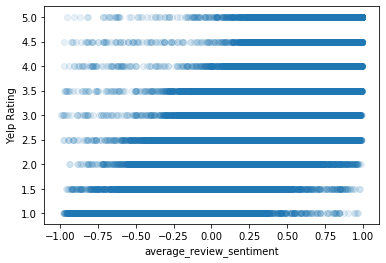

In [45]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'],df['stars'],alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()

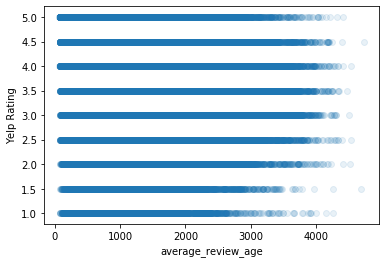

In [46]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'],df['stars'],alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()

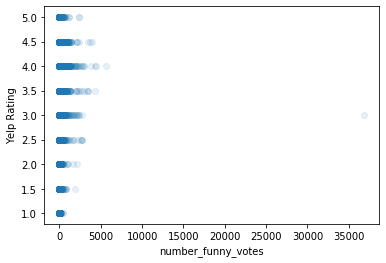

In [47]:
# plot number_funny_votes against stars here
plt.scatter(df['number_funny_votes'],df['stars'],alpha=0.1)
plt.xlabel('number_funny_votes')
plt.ylabel('Yelp Rating')
plt.show()

## Selección de datos
Para poner nuestros datos en un modelo de Regresión Lineal, necesitamos separar nuestras características/features/columnas para modelar las clasificaciones de Yelp. 

De nuestro análisis de correlación vimos que las tres características con las correlaciones más fuertes para la calificación de Yelp son el `average_review_sentiment`, `average_review_length`, y `average_review_age`. 

Ya que queremos profundizar un poco más que usar solo el `average_review_sentiment`, que comprensiblemente tiene una correlación muy alta con la clasificación Yelp, elijamos crear nuestro primer modelo con `average_review_length` y `average_review_age` como características.

Cree una nueva columna de DataFrame que contenga las columnas sobre las que queremos modelar y llamelo `features` con las columnas: `average_review_length` y `average_review_age`. Luego cree otro DataFrame llamado `ratings` que almacene el valor que queremos predecir, la clasificación Yelp o las `stars` en `df`.

In [48]:
features = df[['average_review_length','average_review_age']]
ratings = df['stars']

## Dividir los datos en conjuntos de entrenamiento y pruebas
Estamos casi listos para modelar! Pero primero, necesitamos dividir nuestros datos en un conjunto de entrenamiento y un conjunto de pruebas para poder evaluar qué tan bien funciona nuestro modelo. 

Usaremos la función `train_test_split` de scikit-learn para hacer esta división. Esta función toma dos parámetros requeridos: los datos, o nuestras características, seguidos por nuestra variable dependiente, en nuestro caso la clasificación Yelp. Ajuste el parámetro opcional `test_size` a `0,2`. Finalmente, establezca el parámetro opcional `random_state` en 1. Esto hará que sus datos se dividan de la misma manera que los datos en nuestro código de solución.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

## Crear y entrenar al modelo
Ahora que nuestros datos están divididos en conjuntos de entrenamiento y pruebas, ¡por fin podemos modelar! Importe `LinearRegression` desde el módulo `linear_model` de scikit-learn. 

Cree un nuevo objeto `LinearRegression` llamado `model`. El método `.fit()` ajustará nuestro modelo de Regresión Lineal a nuestros datos de entrenamiento y calculará los coeficientes para nuestras características. Llamar al método `.fit()` en el modelo con `X_train` y `y_train` como parámetros. De esta manera, nuestro modelo ya ha sido entrenado en nuestros datos de entrenamiento!

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluar y comprender el modelo
Ahora podemos evaluar nuestro modelo de varias maneras. La primera forma será usando el método `.score()`, que proporciona el valor `R^2` para nuestro modelo. Recuerde, `R^2` es el coeficiente de determinación, o una medida de cuánto de la varianza en nuestra variable dependiente, la clasificación Yelp predicha, se explica por nuestras variables independientes, nuestros datos de características. 

Los valores de `R^2` van de `0` a `1`, con `0` indicando que el modelo creado no se ajusta a nuestros datos en absoluto, y con `1` indicando que el modelo se ajusta perfectamente a nuestros datos de características. 

Llame `.score()`en nuestro modelo con `X_train` y `y_train `como parámetros para calcular nuestra puntuación `R^2` de entrenamiento. Luego llame de nuevo al `score()`en el modelo con `X_test` y `y_test` como parámetros para calcular `R^2` para nuestros datos de prueba. 

¿Qué dicen estos valores de `R^2` sobre nuestro modelo? ¿Cree usted que estas características por sí solas son capaces de predecir eficazmente las clasificaciones de Yelp?

In [51]:
model.score(X_train,y_train)

0.08250309566544889

In [52]:
model.score(X_test,y_test)

0.08083081210060561

Después de tanto trabajo, por fin podemos echar un vistazo a los coeficientes de nuestras diferentes características! 

El modelo tiene un atributo `.coef_` que es una matriz de los coeficientes de característica determinados al ajustar nuestro modelo a los datos de entrenamiento. Para que sea más fácil ver qué característica corresponde a qué coeficiente, hemos proporcionado un código en la celda que une una lista de nuestras características con los coeficientes y las ordena en orden descendente desde la más predictiva a la menos predictiva.

```
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)
```

Copiela y peguela en la siguiente celda

In [53]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074552),
 ('average_review_age', -0.00011621626836366473)]

Por último, podemos calcular las clasificaciones Yelp previstas para nuestros datos de pruebas y compararlas con sus clasificaciones Yelp reales. 

Nuestro modelo tiene un método `.predict()` que utiliza los coeficientes del modelo para calcular el valor de Yelp predicho. Llamar a `.predict()` en `X_test` y asignar los valores a `y_predicted`. 

Usa Matplotlib para trazar `y_test` vs `y_predicted`. Para un modelo de regresión lineal perfecto, esperaríamos ver los datos trazados a lo largo de la línea `y = x`, ¿Es éste el caso? Si no, ¿por qué no? 

In [54]:
y_predicted = model.predict(X_test)

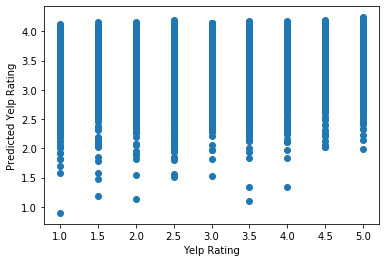

In [55]:
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
#plt.ylim(1,5)
plt.show()

In [61]:
#R: "No es perfecto y las caracteristicas seleccionadas por si solas no son las mejores predictoras. Si vemos una calificacion, por ejemplo, de 3.0 en 
#    el dataset real, nuestro modelo predice un rango de 2.25 hasta 4.1. De hecho el .score nos dio un aviso de ello."

print(y_test)
print(y_predicted)

27092     5.0
127873    3.0
30611     3.5
53929     2.0
17553     4.0
         ... 
72485     5.0
127525    5.0
187053    4.5
93846     3.5
157174    4.5
Name: stars, Length: 37719, dtype: float64
[4.01055012 3.90252256 3.8026436  ... 4.09628076 3.74491468 3.33780016]


## Definir diferentes subconjuntos de datos
Después de evaluar el primer modelo, puede ver que `average_review_length` y `average_review_age` por sí solas no son los mejores predictores para la clasificación de Yelp. 

Vamos a hacer un poco más de modelado con diferentes subconjuntos de características y ver si podemos lograr un modelo más preciso! 

En las celdas de abajo hemos proporcionado diferentes listas de subconjuntos de características con las que modelaremos y evaluaremos. ¿Qué otros subconjuntos de características le gustaría probar? ¿Por qué crees que esos conjuntos de características son más predictivos de la clasificación Yelp que otros? Cree al menos un subconjunto más de características a partir de las cuales desea predecir las clasificaciones de Yelp. Copie y pegue los subconjuntos en la siguiente celda

```
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

# all features
all_features = binary_features + numeric_features
```

In [63]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

# all features
all_features = binary_features + numeric_features

In [64]:
# añada su propio subset aqui 
feature_subset = 

SyntaxError: invalid syntax (<ipython-input-64-94f0842b70c6>, line 2)

## Otros modelos
Ahora que tenemos listas de diferentes subconjuntos de características, podemos crear nuevos modelos a partir de ellos. Para poder comparar más fácilmente el rendimiento de estos nuevos modelos, hemos creado una función para usted llamada `model_these_features()`. 

Esta función replica el proceso de construcción del modelo que acaba de completar con nuestro primer modelo! Tómese un tiempo para revisar cómo funciona la función, analizándola línea por línea. Rellene los comentarios vacíos con una explicación de la tarea que el código debajo está realizando.

```
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):

    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]

    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)

    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)

    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))

    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))

    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)

    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()
```

Copielo y peguelo en la siguiente celda

In [65]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):

    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]

    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)

    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)

    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))

    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))

    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)

    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Una vez que se sienta cómodo con los pasos de la función, ejecute modelos en los siguientes subconjuntos de datos utilizando `model_these_features()`:

`sentiment`: sólo `average_review_sentiment`

`binary_features`: todas las características que tienen un rango de respuesta `[0,1]`

`numeric_features`: todas las características que varían en un rango mayor que `[0,1]`

`all_features`: todas las características

`feature_subset`: su propio subconjunto de características

¿Cómo afecta el cambio de los conjuntos de características al valor R^2 del modelo? ¿Qué características son más importantes para predecir la clasificación Yelp en los diferentes modelos?

Train Score: 0.6118980950438655
Test Score: 0.6114021046919491
[('average_review_sentiment', 2.3033908433749746)]


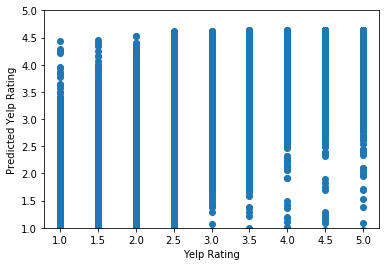

In [66]:
model_these_features(sentiment)

Train Score: 0.012223180709591386
Test Score: 0.01011954220226885
[('has_bike_parking', 0.1900300820804355), ('alcohol?', -0.14549670708137022), ('has_wifi', -0.13187397577761442), ('good_for_kids', -0.08632485990337171), ('takes_credit_cards', 0.07175536492194957), ('take_reservations', 0.04526558530451783)]


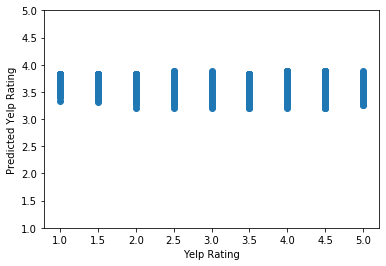

In [67]:
model_these_features(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.6713318798120155
[('average_review_sentiment', 2.2721076642096234), ('price_range', -0.08046080962700945), ('average_number_years_elite', -0.07190366288054378), ('average_caption_length', -0.003347066007784589), ('number_pics', -0.0029565028128958593), ('number_tips', -0.001595305078904253), ('number_cool_votes', 0.0011468839227079843), ('average_number_fans', 0.0010510602097435623), ('average_review_length', -0.0005813655692094137), ('average_tip_length', -0.0005322032063460029), ('number_useful_votes', -0.00023203784758714374), ('average_review_count', -0.00022431702895031686), ('average_review_age', -0.00016930608165042918), ('average_days_on_yelp', 0.00012878025876657175), ('weekday_checkins', 5.918580754502717e-05), ('weekend_checkins', -5.5181762070165286e-05), ('average_number_friends', 4.826992111621573e-05), ('review_count', -3.48348376374068e-05), ('number_funny_votes', -7.884395673712213e-06)]


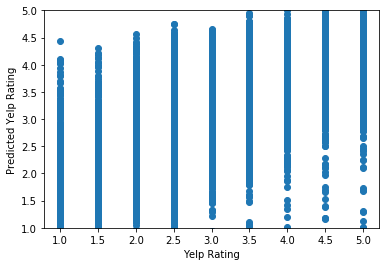

In [69]:
model_these_features(numeric_features)

Train Score: 0.6807828861895334
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.28084569966238), ('alcohol?', -0.14991498593462707), ('has_wifi', -0.12155382629262328), ('good_for_kids', -0.11807814422011736), ('price_range', -0.06486730150042058), ('average_number_years_elite', -0.06278939713895304), ('has_bike_parking', 0.027296969912273844), ('takes_credit_cards', 0.024451837853629255), ('take_reservations', 0.014134559172977566), ('number_pics', -0.0013133612300797674), ('average_number_fans', 0.0010267986822657285), ('number_cool_votes', 0.0009723722734410437), ('number_tips', -0.000854656332087558), ('average_caption_length', -0.0006472749798185271), ('average_review_length', -0.0005896257920272553), ('average_tip_length', -0.0004205217503402835), ('number_useful_votes', -0.00027150641256154344), ('average_review_count', -0.00023398356902507998), ('average_review_age', -0.00015776544111325772), ('average_days_on_yelp', 0.0001232614766288418), ('review_count', 0.000

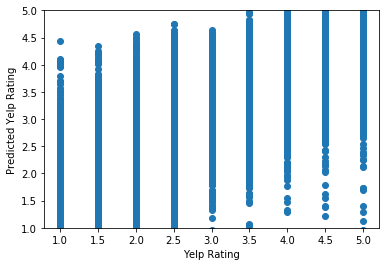

In [70]:
model_these_features(all_features)

## Debut de Danielle's Delicious Delicacies
Ha cargado los datos, los ha limpiado, modelado y evaluado. Estás cansado, pero resplandeciente de orgullo después de todo el trabajo duro. Cierra los ojos y puedes ver claramente el día de apertura de Delicious Delicacies de Danielle con una fila de personas en la puerta. Pero, ¿cuál será su calificación de Yelp? Usemos nuestro modelo para hacer una predicción.

Nuestro mejor modelo era el que utilizaba todas las funciones!!, así que volveremos a trabajar con este modelo. En la celda de abajo imprima `all_features` para obtener un recordatorio de las características con las que estamos trabajando.

In [71]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


Ejecute la celda de abajo para agarrar todas las características y volver a entrenar a nuestro modelo en ellas.

```
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)
```

In [72]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Para darle una perspectiva de los restaurantes que ya existen, hemos proporcionado los valores medios, mínimos y máximos para cada característica/feature/columna a continuación. ¿Será Danielle's Delicious Delicacies otro restaurante promedio, o será un gigante de 5 estrellas entre las masas?

```
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])
```


In [73]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Basado en sus planes para el restaurante, cómo espera que sus clientes califiquen en su página de Yelp para cada uno de los features? llene los espacios en blanco en la matriz NumPy a continuación con sus valores deseados. 

El primer espacio en blanco corresponde a la característica en `index=0` en el DataFrame de arriba, `alcohol?` y el último espacio en blanco corresponde a la característica en `index=24`, `weekend_checkins`. Asegúrese de introducir `0` o `1` para todas las características binarias, y si no está seguro de qué valor poner para una característica, seleccione la media en el DataFrame de arriba. 

Guarde el array de numpy en una variable llamada `danielles_delicious_delicacies` y recuerde hacerle un `reshape(1, -1)`

Después de ingresar los valores, ejecute la celda de predicción a continuación para recibir su calificación de Yelp! ¿Cómo va a ser el debut de Danielle Delicious Delicacies?

In [76]:
danielles_delicious_delicacies = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [77]:
model.predict(danielles_delicious_delicacies)

array([4.03799004])

## Próximos pasos
Usted ha construido con éxito un modelo de regresión lineal que predice la clasificación Yelp de un restaurante! Como has visto, puede ser bastante difícil predecir una calificación como ésta incluso cuando tenemos una plétora de datos. 

¿Qué otras preguntas le vienen a la mente cuando ve los datos que tenemos? ¿Qué ideas cree usted que podrían pronosticar de un tipo diferente de análisis? Aquí hay algunas ideas para reflexionar:

- ¿Podemos predecir el tipo de cocina de un restaurante en función de los usuarios que la revisan?

- ¿Qué restaurantes son similares entre sí en otros aspectos además del tipo de cocina?

- ¿Existe un ambiente diferente en los restaurantes, y qué tipo de restaurantes se ajustan a estos conceptos?

- ¿Cómo afecta el estatus de las redes sociales a la credibilidad y visibilidad de un restaurante?

A medida que avance en el campo de la ciencia de datos, podrá crear modelos que aborden estas preguntas y muchas más. Pero mientras tanto, felicitece, ha alcanzado un gran logro!!